<a href="https://colab.research.google.com/github/LeonardoBusculo/modelo-de-analise-de-metricas-RFV/blob/main/DESAFIO_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
streaming = pd.read_csv("/content/streaming_data.csv")
streaming.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f


In [ ]:
# BUSCANDO AS INFORMAÇÕES DOS DADOS

streaming.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     66607 non-null  float64
 1   Gender                  63368 non-null  object 
 2   Time_on_platform        56464 non-null  float64
 3   Devices_connected       52696 non-null  float64
 4   Subscription_type       52663 non-null  object 
 5   Num_streaming_services  9572 non-null   float64
 6   Num_active_profiles     77884 non-null  int64  
 7   Avg_rating              60614 non-null  float64
 8   Churned                 61148 non-null  float64
 9   User_id                 77884 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.9+ MB


In [ ]:
# CONVERTENDO OS NULOS PARA 0
streaming[["Time_on_platform","Num_streaming_services","Churned","Avg_rating","Devices_connected"]] = streaming[["Time_on_platform","Num_streaming_services","Churned","Avg_rating","Devices_connected"]].fillna(value=0)

In [ ]:
streaming.isna().sum()

Age                       11277
Gender                    14516
Time_on_platform              0
Devices_connected             0
Subscription_type         25221
Num_streaming_services        0
Num_active_profiles           0
Avg_rating                    0
Churned                       0
User_id                       0
dtype: int64

In [ ]:
streaming["Subscription_type"] = streaming["Subscription_type"]. fillna(streaming.Subscription_type.mode()[0])

In [ ]:
# CONVERTENDO OS NULOS PARA 0
streaming[["Time_on_platform","Num_streaming_services","Churned","Avg_rating","Devices_connected"]] = streaming[["Time_on_platform","Num_streaming_services","Churned","Avg_rating","Devices_connected"]].fillna(value=0)

In [ ]:
# ALTERANDO NULOS PELA MÉDIA, IDADE PODE INFLUENCIAR NA EXPLICAÇÃO
streaming["Age"] = streaming["Age"].fillna(value = streaming.Age.mean())

In [ ]:
# VENDO SE OS NULOS FORAM REMOVIDOS
streaming.dropna(inplace = True)

In [ ]:
streaming['Devices_connected'] = streaming['Devices_connected'].astype(int)
streaming["Churned"] = streaming["Churned"].astype(int)
streaming['Avg_rating'] = streaming['Avg_rating'].astype(int)
streaming["Num_streaming_services"] = streaming["Num_streaming_services"].astype(int)
streaming['Time_on_platform'] = streaming['Time_on_platform'].astype(int)
streaming["Age"] = streaming["Age"].astype(int)

In [ ]:
# FAZENDO A VERIFICAÇÃO
streaming.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63368 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     63368 non-null  int64 
 1   Gender                  63368 non-null  object
 2   Time_on_platform        63368 non-null  int64 
 3   Devices_connected       63368 non-null  int64 
 4   Subscription_type       63368 non-null  object
 5   Num_streaming_services  63368 non-null  int64 
 6   Num_active_profiles     63368 non-null  int64 
 7   Avg_rating              63368 non-null  int64 
 8   Churned                 63368 non-null  int64 
 9   User_id                 63368 non-null  object
dtypes: int64(7), object(3)
memory usage: 5.3+ MB


In [ ]:
streaming.dropna(inplace = True)

In [ ]:
# SEPARANDO AS COLUNAS NUMERICAS E CATEGORICAS, IDADE E GÊNERO
cat_vars = ["Subscription_type"]
num_vars = ["Time_on_platform","Devices_connected","Num_streaming_services","Num_active_profiles","Avg_rating"]
modeling_vars = cat_vars + num_vars

In [ ]:
# SEPARANDO O DATAFRAME

X = streaming.filter(modeling_vars).copy()

y = streaming["Churned"].copy()

y = pd.DataFrame(y)

In [ ]:
# MUDANDO AS COLUNAS NUMÉRICAS E CLASSIFICANDO ELAS POR NÚMEROS

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(y.Churned)
y.Churned = le.transform(y.Churned)

le.fit(X. Subscription_type)
X.Subscription_type = le.transform(X.Subscription_type)

In [ ]:
# CRIANDO A BASE DE TREINO E TESTE

from sklearn.model_selection import train_test_split

X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = 0.2, stratify = Y)

In [ ]:
# TREINANDO NOSSO MODELO

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
lr = model.fit(X_treino, Y_treino)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
lr.predict(X_teste)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# FAZENDO AS COMPARAÇÕES

X_teste.assign(churn = Y_teste).assign(label = lr.predict(X_teste))

,Subscription_type,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,churn,label
12386,1,3762,0,2,2,4,1,0
1339,1,5922,5,0,5,0,0,0
68578,1,0,1,0,4,0,1,0
55768,1,882,0,0,3,3,0,0
64418,1,6102,3,0,2,3,0,0
...,...,...,...,...,...,...,...,...
38084,0,0,0,3,2,1,1,0
32257,2,0,0,0,5,3,0,0
61512,0,0,0,4,5,0,0,0
3710,2,0,0,0,3,0,0,0


In [ ]:
lr.predict(X_teste)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from  sklearn.metrics import confusion_matrix

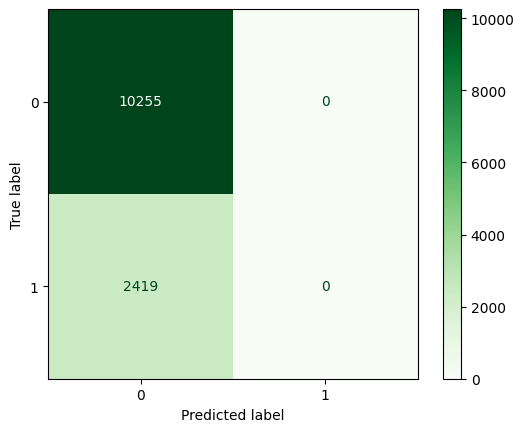

In [ ]:
# CONFUÇÃO, VALORES FORA DA REALIDADE PARA MELHORAR
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

matriz_confucao = ConfusionMatrixDisplay.from_estimator(lr, X_teste, Y_teste, cmap = 'Greens', values_format = 'd')
matriz_confucao;

In [ ]:
# MOSTRANDO AS MÉTRICAS QUE APRESENTARAM VALORES DISTINTOS
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print(f"Acurácia (Treino): {accuracy_score(Y_treino, lr.predict(X_treino))}")
print(f"Acurácia (Teste): {accuracy_score(Y_teste, lr.predict(X_teste))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(Y_treino, lr.predict(X_treino))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(Y_teste, lr.predict(X_teste))}")
print("====================================")
print(f"Precision (Treino): {precision_score(Y_treino, lr.predict(X_treino))}")
print(f"Precision (Teste): {precision_score(Y_teste, lr.predict(X_teste))}")
print("====================================")
print(f"Recall (Treino): {recall_score(Y_treino, lr.predict(X_treino))}")
print(f"Recall (Teste): {recall_score(Y_teste, lr.predict(X_teste))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(Y_treino, lr.predict(X_treino))}")
print(f"F1-Score (Teste): {f1_score(Y_teste, lr.predict(X_teste))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(Y_treino, lr.predict_proba(X_treino)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(Y_teste, lr.predict_proba(X_teste)[:,1])}")

Acurácia (Treino): 0.8090898331163451
Acurácia (Teste): 0.8091368155278523
Acurácia Balanceada (Treino): 0.5
Acurácia Balanceada (Teste): 0.5
Precision (Treino): 0.0
Precision (Teste): 0.0
Recall (Treino): 0.0
Recall (Teste): 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F1-Score (Treino): 0.0
F1-Score (Teste): 0.0
ROCAUC (Treino): 0.4999559658027696
ROCAUC (Teste): 0.4941049133817702


In [ ]:
# RANDOMFOREST
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [ ]:
# TREINAMENTO COM RF

rf.fit(X_treino, Y_treino)

RandomForestClassifier()

In [ ]:
# FAZENDO COMPARAÇÃO

X_teste.assign(churn = Y_teste).assign(label = rf.predict(X_teste))

,Subscription_type,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,churn,label
12386,1,3762,0,2,2,4,1,0
1339,1,5922,5,0,5,0,0,0
68578,1,0,1,0,4,0,1,0
55768,1,882,0,0,3,3,0,0
64418,1,6102,3,0,2,3,0,0
...,...,...,...,...,...,...,...,...
38084,0,0,0,3,2,1,1,0
32257,2,0,0,0,5,3,0,0
61512,0,0,0,4,5,0,0,0
3710,2,0,0,0,3,0,0,0


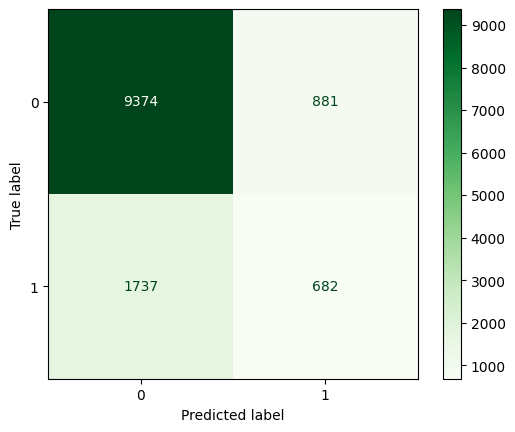

In [ ]:
# USANDO O RANDOMFOREST ENXERGAMOS UMA MELHORA EM NOSSO MODELO

matriz_confucao = ConfusionMatrixDisplay.from_estimator(rf, X_teste, Y_teste, cmap = "Greens", values_format = 'd')
matriz_confucao;

In [ ]:
# COM O BOM NÍVEL DE ACURACIDADE, TESTAMOS O GRIDSEACH PARA VERIFICAR SE HOUVE MELHORA NOS MRESULTADOS

print(f"Acurácia (Treino): {accuracy_score(Y_treino, rf.predict(X_treino))}")
print(f"Acurácia (Teste): {accuracy_score(Y_teste, rf.predict(X_teste))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(Y_treino, rf.predict(X_treino))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(Y_teste, rf.predict(X_teste))}")
print("====================================")
print(f"Precision (Treino): {precision_score(Y_treino, rf.predict(X_treino))}")
print(f"Precision (Teste): {precision_score(Y_teste, rf.predict(X_teste))}")
print("====================================")
print(f"Recall (Treino): {recall_score(Y_treino, rf.predict(X_treino))}")
print(f"Recall (Teste): {recall_score(Y_teste, rf.predict(X_teste))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(Y_treino, rf.predict(X_treino))}")
print(f"F1-Score (Teste): {f1_score(Y_teste, rf.predict(X_teste))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(Y_treino, rf.predict_proba(X_treino)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(Y_teste, rf.predict_proba(X_teste)[:,1])}")

Acurácia (Treino): 0.9514143685643272
Acurácia (Teste): 0.7934353795171216
Acurácia Balanceada (Treino): 0.8763841694366683
Acurácia Balanceada (Teste): 0.5980126856115722
Precision (Treino): 0.9875658872820652
Precision (Teste): 0.436340371081254
Recall (Treino): 0.7550113659847076
Recall (Teste): 0.2819346837536172
F1-Score (Treino): 0.8557709199508111
F1-Score (Teste): 0.34254143646408836
ROCAUC (Treino): 0.9637400598773384
ROCAUC (Teste): 0.6292164118411672


In [ ]:
# IMPORTANDO O GRIDSEARCHCV E TENTANDO MELHORAR A ACURACIDADE
from sklearn.model_selection import GridSearchCV

parameters = {"max_depth":[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

grid_search = GridSearchCV(rf, parameters, scoring = "accuracy", cv = 5, n_jobs = -1)

In [ ]:
grid_search.fit(X_treino, Y_treino)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [ ]:
# VERIFICANDO MELHORES PARÂMETROS COM GRIDSEARCH

grid_search.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# APLICANDO OS PARÂMETROS ESTIMADOS ACIMA

rf_turned = RandomForestClassifier(bootstrap = True,
 ccp_alpha = 0.0,
 class_weight = None,
 criterion ='gini',
 max_depth = 9,
 max_features = 'sqrt',
 max_leaf_nodes = None,
 max_samples = None,
 min_impurity_decrease = 0.0,
 min_samples_leaf = 1,
 min_samples_split = 2,
 min_weight_fraction_leaf = 0.0,
 n_estimators = 100,
 n_jobs = None,
 oob_score = False,
 random_state = None,
 verbose = 0,
 warm_start = False)

In [ ]:
# TREINANDO OS PARÂMETROS TUNADOS

rf_turned.fit(X_treino, Y_treino)

RandomForestClassifier(max_depth=9)

In [ ]:
rf_turned.predict(X_teste)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
X_teste.assign(churn = Y_teste). assign(label = rf_turned.predict(X_teste))

,Subscription_type,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,churn,label
12386,1,3762,0,2,2,4,1,0
1339,1,5922,5,0,5,0,0,0
68578,1,0,1,0,4,0,1,0
55768,1,882,0,0,3,3,0,0
64418,1,6102,3,0,2,3,0,0
...,...,...,...,...,...,...,...,...
38084,0,0,0,3,2,1,1,0
32257,2,0,0,0,5,3,0,0
61512,0,0,0,4,5,0,0,0
3710,2,0,0,0,3,0,0,0


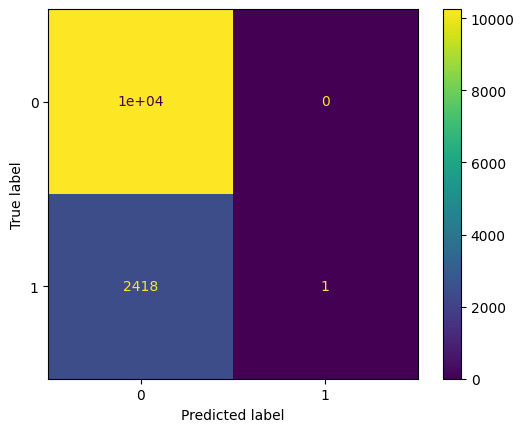

In [ ]:
# ENTRE GRIDSEARCH E RANDOMFOREST, OS MELHORES VALORES FORAM APRESENTADOS PELO RANDOMFOREST

ConfusionMatrixDisplay.from_estimator(rf_turned, X_teste, Y_teste);

In [ ]:
print(f"Acurácia (Treino): {accuracy_score(Y_treino, rf_turned.predict(X_treino))}")
print(f"Acurácia (Teste): {accuracy_score(Y_teste, rf_turned.predict(X_teste))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(Y_treino, rf_turned.predict(X_treino))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(Y_teste, rf_turned.predict(X_teste))}")
print("====================================")
print(f"Precision (Treino): {precision_score(Y_treino, rf_turned.predict(X_treino))}")
print(f"Precision (Teste): {precision_score(Y_teste, rf_turned.predict(X_teste))}")
print("====================================")
print(f"Recall (Treino): {recall_score(Y_treino, rf_turned.predict(X_treino))}")
print(f"Recall (Teste): {recall_score(Y_teste, rf_turned.predict(X_teste))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(Y_treino, rf_turned.predict(X_treino))}")
print(f"F1-Score (Teste): {f1_score(Y_teste, rf_turned.predict(X_teste))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(Y_treino, rf_turned.predict_proba(X_treino)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(Y_teste, rf_turned.predict_proba(X_teste)[:,1])}")

Acurácia (Treino): 0.8094449047224523
Acurácia (Teste): 0.8092157172163484
Acurácia Balanceada (Treino): 0.5009299442033478
Acurácia Balanceada (Teste): 0.5002066969822241
Precision (Treino): 1.0
Precision (Teste): 1.0
Recall (Treino): 0.0018598884066955983
Recall (Teste): 0.00041339396444811904
F1-Score (Treino): 0.0037128712871287127
F1-Score (Teste): 0.0008264462809917354
ROCAUC (Treino): 0.7010986780979085
ROCAUC (Teste): 0.5475968024148175
